2.3094010767585034
2.3094010767585034
7255197.456936873
7255197.456936872


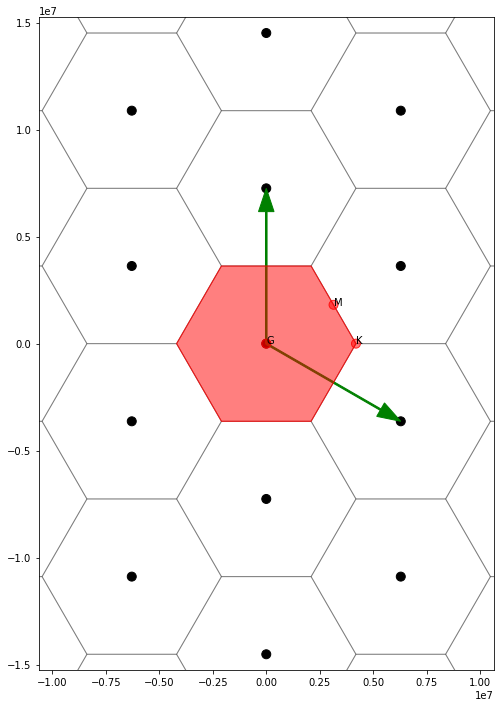

In [1]:
import numpy as np
from reciprocal.lattice import LatticeVectors, Lattice
from reciprocal.canvas import Canvas
from reciprocal.primitive import Primitive
from reciprocal.kvector import KVectorGroup
from reciprocal.kspace import KSpace
import matplotlib.pyplot as plt
import scipy.spatial
from matplotlib.patches import Polygon, Circle
#from matplotlib.patches import Circle
#from matplotlib.backends.backend_pdf import PdfPages

angle = 60.0
lat = Lattice(np.pi, np.pi, angle)
rec_lat = lat.make_reciprocal()
rec_lat.bzone.irreducible.make_sampling(constraint={'type':'n_points','value':12})
print(rec_lat.vectors.length1)
print(rec_lat.vectors.length2)
"""
fig, ax_1 = plt.subplots(1, 1, figsize= (12, 8))
can = Canvas(ax=ax_1)
can.plot_vectors(rec_lat)
can.plot_lattice(rec_lat)
can.plot_tesselation(rec_lat)
can.plot_symmetry_points(rec_lat)
can.plot_bzone(rec_lat)
can.plot_sampling(rec_lat.bzone.irreducible.symmetric_sampling)
"""
#angle = 60.0
lat2 = Lattice(1000e-9, 1000e-9, angle)
rec_lat2 = lat2.make_reciprocal()
rec_lat2.bzone.irreducible.make_sampling(constraint={'type':'n_points','value':12})
print(rec_lat2.vectors.length1)
print(rec_lat2.vectors.length2)
fig2, ax_2 = plt.subplots(1, 1, figsize= (12, 12))
can2 = Canvas(ax=ax_2)
can2.plot_vectors(rec_lat2)
can2.plot_lattice(rec_lat2)
can2.plot_tesselation(rec_lat2)
can2.plot_symmetry_points(rec_lat2)
can2.plot_bzone(rec_lat2)
#can2.plot_sampling(rec_lat2.bzone.irreducible.sampling)
#can2.plot_sampling(rec_lat.bzone.sampling*(7255197.456936873/2.3094010767585034),color='grey')



In [3]:
polygon_path = Polygon(rec_lat.bzone.vertices, closed=True).get_path()

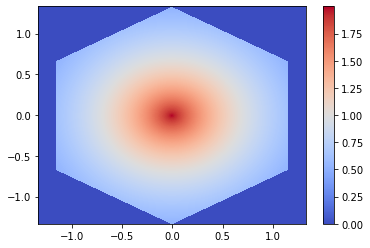

In [7]:
def f(x,y):
    rad = np.sqrt(x**2 + y**2)
    return 2.*np.exp( -(rad))
x = np.linspace(-4./3.,4./3.,10000)
y = np.linspace(-4./3.,4./3.,10000)
X, Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)
for ii,xi in enumerate(x):
    for jj, yj in enumerate(y):
        trial_point = np.array([xi,yj])
        lies_in = polygon_path.contains_point(trial_point, radius=1e-7)
        if lies_in:
            Z[ii, jj] = f(xi,yj)
        else:
            X[ii, jj] = 0.0
            
plt.pcolormesh(x,y,Z,cmap='coolwarm')
plt.colorbar()
analytical = np.trapz(np.trapz(Z,y),x)

In [5]:
print(analytical)

4.2918947303657475


(1e-05, 10.0)

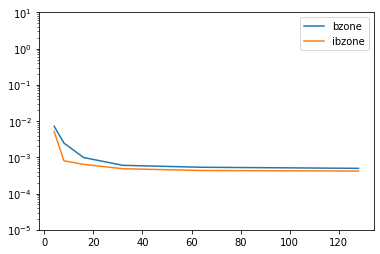

In [6]:
    

#analytical = 1.0
angle = 60.0
lat = Lattice(np.pi, np.pi, angle)
rec_lat = lat.make_reciprocal()
bzone_error = []
ibzone_error = []
point_values = np.array([4,8,16,32,64,128])
for n_points in point_values:
    rec_lat.bzone.irreducible.make_sampling(constraint={'type':'n_points','value':n_points})
    rec_lat.bzone.make_sampling()
    f_1 = f(rec_lat.bzone.sampling[:,0],rec_lat.bzone.sampling[:,1])
    int_1 = rec_lat.bzone.integrate_sampled_function(f_1)
    bzone_error.append( abs(int_1-analytical)/analytical)
    #print("Integral bzone: {}".format(int_1))
    f_2 = f(rec_lat.bzone.irreducible.sampling[:,0],rec_lat.bzone.irreducible.sampling[:,1])
    int_2 = rec_lat.bzone.irreducible.integrate_sampled_function(f_2)*12
    ibzone_error.append( abs(int_2-analytical)/analytical)
    #print("Integral ibzone: {}".format(int_2*8))
plt.loglog(point_values, bzone_error, label='bzone')
plt.loglog(point_values, ibzone_error, label='ibzone')
plt.legend()
plt.ylim((1e-5, 10.0))

Integral trapz: 1.9999999999999998
Integral bzone: 2.0000000000000004
Integral triangulate iBzone: 2.023148148148148


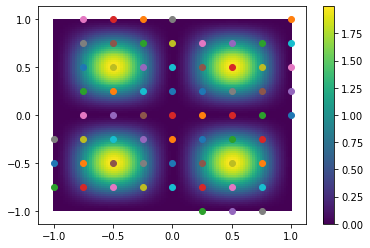

In [9]:
integral_1 = 0.0
for row in range(rec_lat.bzone.sampling.shape[0]):
    point = rec_lat.bzone.sampling[row,:]
    integral_1 += f(point[0],point[1])*(0.25)**2
    plt.scatter(point[0],point[1])
print("Integral bzone: {}".format(integral_1))

i_points = []
z_vals = []
#print(rec_lat.bzone.irreducible.sampling)
integral_2 = 0.
"""
for key, val in rec_lat.bzone.irreducible.sampling.items():    
    for row in range(val.shape[0]):
        point = val[row,:]
        i_points.append(point)
        base_value = f(point[0],point[1])*(0.25)**2
        z_val = f(point[0],point[1])
        z_vals.append(z_val)
        if key == 'G':
            integral_2 += base_value*8
        elif key == 'M':
            integral_2 += base_value*8
        elif key == 'X':
            integral_2 += base_value*8
        elif key == 'onSymmetryAxis':
            integral_2 += base_value*8
        elif key == 'interior':
            integral_2 += base_value*8            
print("Integral sum iBzone: {}".format(integral_2))
i_points=np.array(i_points)
"""
for row in range(rec_lat.bzone.irreducible.sampling.shape[0]):
    point = rec_lat.bzone.irreducible.sampling[row,:]
    z_val = f(point[0],point[1])
    z_vals.append(z_val)

#print(i_points.shape)

tri = scipy.spatial.Delaunay(rec_lat.bzone.irreducible.sampling)
#print(tri.simplices[:10,:])

z_sum, area_sum = sumtriangles(rec_lat.bzone.irreducible.sampling, np.array(z_vals), tri.simplices )
integral_3 = 8*z_sum
print("Integral triangulate iBzone: {}".format(integral_3))

In [ ]:


"""
kspace = KSpace(rec_lat)
wvl = 1450.0e-9
k0 = 2*np.pi/wvl
n = 1.464406158
print(n, k0)
kspace.set_fermi_radius(k0*n)
can.plot_fermi_circle(kspace)
"""


#woods = kspace.calc_woods_anomalies(1)
#print(woods)
#plt.scatter(woods[0][0], woods[0][1], zorder= 10)
"""
phi = np.radians(0.0)
theta= np.radians(10.0)
kxy = k0*np.sin(theta)*n*np.array([ np.cos(phi), np.sin(phi)])
#fermi = Circle(xy=[0.0, 0.0], radius=k0*n)
fermi = Circle(xy=[0.0, 0.0], radius=k0*n, facecolor=[0.0, 0.0, 0.0, 0.0], edgecolor=[0.0, 0.0, 0.0, 1.0])
ax_1.add_artist(fermi)

vec1 = rec_rlat.vectors.vec1
vec2 = rec_rlat.vectors.vec1
print(kxy)
plt.scatter(kxy[0], kxy[1], zorder= 10)
plt.scatter(woods[0][0], woods[0][1], color='orange', zorder= 11)
plt.arrow(kxy[0], kxy[1], -vec1[0], vec1[1])
lims = 1e7
plt.xlim([-lims, lims])
plt.ylim([-lims, lims])
plt.sca(ax_2)
plt.xlim(0, 60.)
plt.ylim()
"""

In [ ]:
def sumtriangles(xy, z, triangles ):
    """ integrate scattered data, given a triangulation
    zsum, areasum = sumtriangles( xy, z, triangles )
    In:
        xy: npt, dim data points in 2d, 3d ...
        z: npt data values at the points, scalars or vectors
        triangles: ntri, dim+1 indices of triangles or simplexes, as from
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html
    Out:
        zsum: sum over all triangles of (area * z at midpoint).
            Thus z at a point where 5 triangles meet
            enters the sum 5 times, each weighted by that triangle's area / 3.
        areasum: the area or volume of the convex hull of the data points.
            For points over the unit square, zsum outside the hull is 0,
            so zsum / areasum would compensate for that.
            Or, make sure that the corners of the square or cube are in xy.
    """
    # z concave or convex => under or overestimates
    npt, dim = xy.shape
    ntri, dim1 = triangles.shape
    assert npt == len(z), "shape mismatch: xy %s z %s" % (xy.shape, z.shape)
    assert dim1 == dim+1, "triangles ? %s" % triangles.shape
    zsum = np.zeros( z[0].shape )
    areasum = 0
    dimfac = np.prod( np.arange( 1, dim+1 ))
    for tri in triangles:
        corners = xy[tri]
        t = corners[1:] - corners[0]
        if dim == 2:
            area = abs( t[0,0] * t[1,1] - t[0,1] * t[1,0] ) / 2
        else:
            area = abs( np.linalg.det( t )) / dimfac  # v slow
        zsum += area * z[tri].mean(axis=0)
        areasum += area
    return (zsum, areasum)

In [63]:
keyset=np.linspace(0,1,10)
for ii in np.ndindex(*keyset.shape):
    print(ii)

(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
